# **MNIST Digit Classification Machine Learning Project**


---


- Load the MNIST dataset using the Keras API and preprocess it by scaling the pixel values to be between 0 and 1.
- Split the dataset into training and testing sets.
- Build a deep neural network model using the Keras Sequential API, with several convolutional and dense layers, and compile the model with an appropriate loss function and optimizer.
- Train the model on the training dataset using the fit function, and monitor its performance on the validation dataset.
- Evaluate the model's performance on the testing dataset using the evaluate function, and print the accuracy and loss metrics.
- Print a classification report and a confusion matrix to get a better understanding of the model's performance for each class.
- Plot some sample images from the testing dataset along with their true labels and predicted labels to see how well the model is performing on some sample images.



In [1]:
#import necessary libraries
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


# **MNIST Dataset:**

- The MNIST dataset is a collection of 70,000 grayscale images of handwritten digits (0 to 9) that are 28x28 pixels in size.
- It is commonly used as a benchmark dataset for image classification tasks in machine learning and deep learning.
- The dataset is split into 60,000 training images and 10,000 testing images, and has become a standard dataset for testing and comparing different machine learning algorithms for image recognition tasks.

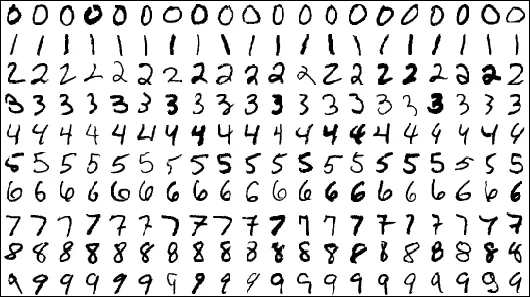





In [2]:

# Load the dataset
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Data preprocessing
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
X_train, X_test = X_train / 255.0, X_test / 255.0

In [4]:
# Split the data into training and testing datasets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


# **Build and Train Model**

In [5]:
# Build the model
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

For practice we are just training the model for 5 epochs, but you can increase the number of epochs! 

In [6]:
# Train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))


Epoch 1/5
1500/1500 [==============================] - 25s 16ms/step - loss: 0.1759 - accuracy: 0.9479 - val_loss: 0.0711 - val_accuracy: 0.9787
Epoch 2/5
1500/1500 [==============================] - 24s 16ms/step - loss: 0.0613 - accuracy: 0.9816 - val_loss: 0.0594 - val_accuracy: 0.9818
Epoch 3/5
1500/1500 [==============================] - 24s 16ms/step - loss: 0.0383 - accuracy: 0.9881 - val_loss: 0.0533 - val_accuracy: 0.9847
Epoch 4/5
1500/1500 [==============================] - 23s 15ms/step - loss: 0.0257 - accuracy: 0.9921 - val_loss: 0.0504 - val_accuracy: 0.9869
Epoch 5/5
1500/1500 [==============================] - 33s 22ms/step - loss: 0.0181 - accuracy: 0.9941 - val_loss: 0.0532 - val_accuracy: 0.9862


# **Evaluate the model**

In [7]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0486 - accuracy: 0.9848
Test accuracy: 0.9847999811172485


In [9]:

# Save the model in your google drive or on your system so you can use this to make predictions later!
model.save('mnist_model.h5')

# **Classification Report**

you can print a classification report that includes various performance metrics like accuracy, precision, recall, and F1-score for each class. Here's how you can do it:

In [10]:
from sklearn.metrics import classification_report

# Evaluate the model
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print('Classification Report:')
print(classification_report(y_test, y_pred))


313/313 [==============================] - 1s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In the above code, we first use the predict() function to predict the class labels for the testing dataset, and then use the argmax() function to convert the predicted probabilities into class labels. Finally, we use the classification_report() function to print a report that includes various performance metrics like precision, recall, F1-score, and support for each class. The support represents the number of samples in each class in the testing dataset.

#**Confusion Matrix**
You can print the confusion matrix to get a better understanding of how the model is performing for each class. Here's how you can do it




In [11]:
from sklearn.metrics import confusion_matrix

# Evaluate the model
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)


313/313 [==============================] - 1s 4ms/step
Confusion Matrix:
[[ 975    1    0    0    0    0    2    1    1    0]
 [   0 1131    1    0    0    0    1    1    1    0]
 [   2    5 1013    1    1    0    0    6    2    2]
 [   1    0    1  998    0    3    0    2    3    2]
 [   0    1    0    0  971    0    4    0    0    6]
 [   1    0    1   11    0  870    5    0    4    0]
 [   7    3    0    0    3    3  940    0    2    0]
 [   1    4    5    0    0    0    0 1011    1    6]
 [   4    1    4    0    3    3    2    3  947    7]
 [   3    1    0    1    7    1    0    4    0  992]]


Let's add some color to the confusion matrix

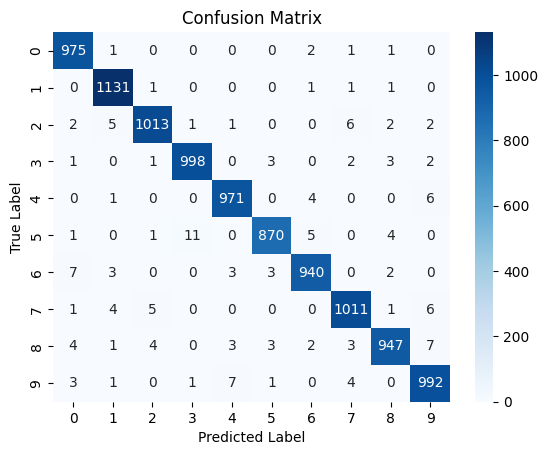

In [14]:
import seaborn as sns

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Make predictions on test images!

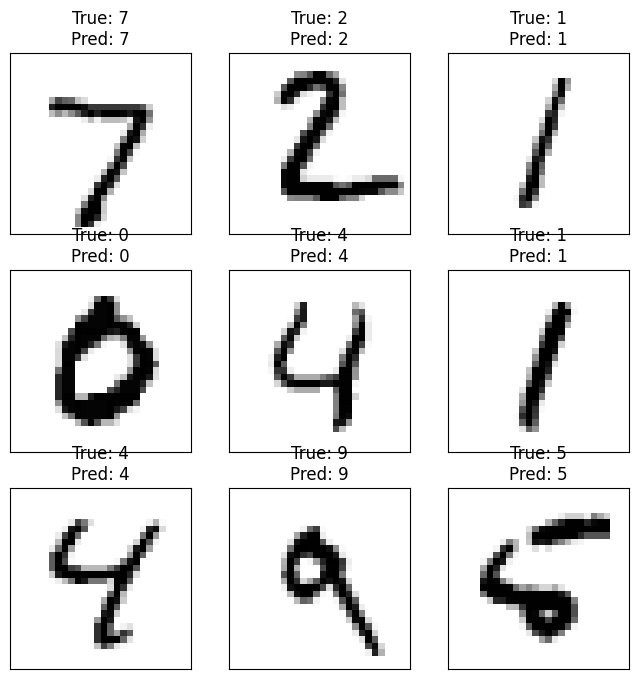

In [12]:
# Plot some sample images from the testing dataset
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(28, 28), cmap='binary')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("True: {}\nPred: {}".format(y_test[i], y_pred[i]))
plt.show()


# **That's all!**